ASSIGNMENT 1: PRINCIPLE OF DATA SCIENCE (HOUSE RENT PREDICTION)
---

In [1]:
#Importing all the Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
#Loading the Dataset into the jupyter notebook
# The most prior step is to load the dataset and have an overview of the data and have a glance before the diving into the data
file_path = "C:/Users/Junaid/Documents/Data Science Resources/Activity 1 - Group 12/COMP5310_Assignment1_Activity1-Group12/msha0502/house_rental_regression.csv"
df = pd.read_csv(file_path)

df.shape

(3477, 110)

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,Availability,Floor,Kitchen,Beds,Dressing,Baths,Toilets,Office,ProfSpace,PetFriendly,Armored door,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Heating type,HeatPump,SolarPanels,Thermic solar panels,WaterHeater,DoubleGlazing,BuildingType,Rent,Costs,Tenement,price,space,address,listing_type,Floors,Frontages,OutParking,LivingArea,LivingRmSurface,Bed1Surface,Bed2Surface,Furnished,TerraceSurface,Intercom,Visio phone,As built plan,Address,Website,ExtRef,Agency,YearBuilt,BldgCondition,LivingRm,DiningRm,LaundryRm,Basement,TerraceOrient,Caretaker,Elevator,Accessible,SecAccess,AirCond,TVCable,Jacuzzi,Sauna,Pool,Internet,FuelCert,PriorityPurchase,Available,Street frontage width,description,KitchenSurface,BasementSurface,Neighbourhood,Fireplaces,Terrace,GardenSurface,GardenOrient,PlanningPerm,SubdivisionPerm,ShowerRms,FloodZone,Surroundings,VirtualVisit,PropertyName,CovParking,PlanningBreach,ProfSpaceSurface,Obligation to build,AtticSurface,Bed3Surface,OfficeSurface,Attic,PlotSurface,SewerConnection,Utilities,GroundFloorSurface,LandUse,Garden,ELevel,Agent's name,LandFacingStreet,WoodedLand,RearPlot,FlatLand,Bed4Surface,EPCDesc,Bed5Surface,LotWidth,Isolated,ExtraInfo,Annexes
0,0,January 31 2023 - 12:00 AM,2.0,USA installed,1.0,No,1.0,1.0,No,No,No,No,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,No,No,No,Yes,All kind,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,1 bedroom,1190 — Forest,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,March 1 2023 - 12:00 AM,3.0,Installed,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,No,No,NaN,No,NaN,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",2 bedrooms | 90 m²\nsquare meters,Ask for the exact address,Apartment for rent,3.0,2.0,1.0,90 m²\nsquare meters,30 m²\nsquare meters,16 m²\nsquare meters,12 m²\nsquare meters,No,10 m²\nsquare meters,Yes,Yes,No,Rue Des Carmélites 88\n1180 - Uccle,http://www.immofadan.be,15274JADS,IMMO FADAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,April 1 2023 - 12:00 AM,3.0,USA hyper equipped,2.0,No,1.0,1.0,No,No,No,No,242 kWh/m²\nkilowatt hour per square meters,E,20130605-0000169186-01-4,52 kg CO₂/m²,Not specified,Gas,No,No,No,No,Yes,All kind,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",2 bedrooms | 90 m²\nsquare meters,1040 — Etterbeek,Apartment for rent,3.0,2.0,NaN,90 m²\nsquare meters,NaN,16 m²\nsquare meters,10 m²\nsquare meters,NaN,3 m²\nsquare meters,Yes,No,NaN,NaN,NaN,NaN,NaN,1970.0,Good,Yes,Yes,Yes,Yes,South East,No,No,No,No,No,Yes,No,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,3.0,Installed,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,542 kWh/m²\nkilowatt hour per square meters,G,Not specified,109 kg CO₂/m²,Not specified,Gas,NaN,NaN,NaN,NaN,NaN,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",2 bedrooms | 75 m²\nsquare meters,Ask for the exact address,Apartment for rent,3.0,2.0,NaN,75 m²\nsquare meters,22 m²\nsquare meters,NaN,NaN,No,NaN,NaN,NaN,No,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,http://www.macnash.com,267766 - 5100893,Macnash Montgomery,NaN,Good,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Immediately,15 m,"Between 

In [4]:
df.dtypes

Unnamed: 0        int64
Availability     object
Floor           float64
Kitchen          object
Beds            float64
                 ...   
Bed5Surface      object
LotWidth         object
Isolated         object
ExtraInfo        object
Annexes         float64
Length: 110, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Columns: 110 entries, Unnamed: 0 to Annexes
dtypes: float64(13), int64(1), object(96)
memory usage: 2.9+ MB


In [6]:
for col in df.columns:
    print(col,"            ",df[col].dtype)

Unnamed: 0              int64
Availability              object
Floor              float64
Kitchen              object
Beds              float64
Dressing              object
Baths              float64
Toilets              float64
Office              object
ProfSpace              object
PetFriendly              object
Armored door              object
Primary energy consumption              object
Energy class              object
Reference number of the EPC report              object
CO₂ emission              object
Yearly theoretical total energy consumption              object
Heating type              object
HeatPump              object
SolarPanels              object
Thermic solar panels              object
WaterHeater              object
DoubleGlazing              object
BuildingType              object
Rent              object
Costs              object
Tenement              object
price              object
space              object
address              object
listing_type           

I observe from the dataset that the column name 'Unnamed: 0' is irrelevant and it is not even required so it is just better that we remove as we already have a column which will help us in indexing.

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Availability,Floor,Kitchen,Beds,Dressing,Baths,Toilets,Office,ProfSpace,PetFriendly,Armored door,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Heating type,HeatPump,SolarPanels,Thermic solar panels,WaterHeater,DoubleGlazing,BuildingType,Rent,Costs,Tenement,price,space,address,listing_type,Floors,Frontages,OutParking,LivingArea,LivingRmSurface,Bed1Surface,Bed2Surface,Furnished,TerraceSurface,Intercom,Visio phone,As built plan,Address,Website,ExtRef,Agency,YearBuilt,BldgCondition,LivingRm,DiningRm,LaundryRm,Basement,TerraceOrient,Caretaker,Elevator,Accessible,SecAccess,AirCond,TVCable,Jacuzzi,Sauna,Pool,Internet,FuelCert,PriorityPurchase,Available,Street frontage width,description,KitchenSurface,BasementSurface,Neighbourhood,Fireplaces,Terrace,GardenSurface,GardenOrient,PlanningPerm,SubdivisionPerm,ShowerRms,FloodZone,Surroundings,VirtualVisit,PropertyName,CovParking,PlanningBreach,ProfSpaceSurface,Obligation to build,AtticSurface,Bed3Surface,OfficeSurface,Attic,PlotSurface,SewerConnection,Utilities,GroundFloorSurface,LandUse,Garden,ELevel,Agent's name,LandFacingStreet,WoodedLand,RearPlot,FlatLand,Bed4Surface,EPCDesc,Bed5Surface,LotWidth,Isolated,ExtraInfo,Annexes
0,January 31 2023 - 12:00 AM,2.0,USA installed,1.0,No,1.0,1.0,No,No,No,No,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,No,No,No,Yes,All kind,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,1 bedroom,1190 — Forest,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,March 1 2023 - 12:00 AM,3.0,Installed,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,No,No,NaN,No,NaN,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",2 bedrooms | 90 m²\nsquare meters,Ask for the exact address,Apartment for rent,3.0,2.0,1.0,90 m²\nsquare meters,30 m²\nsquare meters,16 m²\nsquare meters,12 m²\nsquare meters,No,10 m²\nsquare meters,Yes,Yes,No,Rue Des Carmélites 88\n1180 - Uccle,http://www.immofadan.be,15274JADS,IMMO FADAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April 1 2023 - 12:00 AM,3.0,USA hyper equipped,2.0,No,1.0,1.0,No,No,No,No,242 kWh/m²\nkilowatt hour per square meters,E,20130605-0000169186-01-4,52 kg CO₂/m²,Not specified,Gas,No,No,No,No,Yes,All kind,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",2 bedrooms | 90 m²\nsquare meters,1040 — Etterbeek,Apartment for rent,3.0,2.0,NaN,90 m²\nsquare meters,NaN,16 m²\nsquare meters,10 m²\nsquare meters,NaN,3 m²\nsquare meters,Yes,No,NaN,NaN,NaN,NaN,NaN,1970.0,Good,Yes,Yes,Yes,Yes,South East,No,No,No,No,No,Yes,No,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,Installed,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,542 kWh/m²\nkilowatt hour per square meters,G,Not specified,109 kg CO₂/m²,Not specified,Gas,NaN,NaN,NaN,NaN,NaN,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",2 bedrooms | 75 m²\nsquare meters,Ask for the exact address,Apartment for rent,3.0,2.0,NaN,75 m²\nsquare meters,22 m²\nsquare meters,NaN,NaN,No,NaN,NaN,NaN,No,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,http://www.macnash.com,267766 - 5100893,Macnash Montgomery,NaN,Good,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Immediately,15 m,"Between Malou park and Sour

Creating a Copy of the dataframe to check if there are any duplicate columns

In [8]:
data = df.copy()

In [9]:
data[data.duplicated()]

,Availability,Floor,Kitchen,Beds,Dressing,Baths,Toilets,Office,ProfSpace,PetFriendly,Armored door,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Heating type,HeatPump,SolarPanels,Thermic solar panels,WaterHeater,DoubleGlazing,BuildingType,Rent,Costs,Tenement,price,space,address,listing_type,Floors,Frontages,OutParking,LivingArea,LivingRmSurface,Bed1Surface,Bed2Surface,Furnished,TerraceSurface,Intercom,Visio phone,As built plan,Address,Website,ExtRef,Agency,YearBuilt,BldgCondition,LivingRm,DiningRm,LaundryRm,Basement,TerraceOrient,Caretaker,Elevator,Accessible,SecAccess,AirCond,TVCable,Jacuzzi,Sauna,Pool,Internet,FuelCert,PriorityPurchase,Available,Street frontage width,description,KitchenSurface,BasementSurface,Neighbourhood,Fireplaces,Terrace,GardenSurface,GardenOrient,PlanningPerm,SubdivisionPerm,ShowerRms,FloodZone,Surroundings,VirtualVisit,PropertyName,CovParking,PlanningBreach,ProfSpaceSurface,Obligation to build,AtticSurface,Bed3Surface,OfficeSurface,Attic,PlotSurface,SewerConnection,Utilities,GroundFloorSurface,LandUse,Garden,ELevel,Agent's name,LandFacingStreet,WoodedLand,RearPlot,FlatLand,Bed4Surface,EPCDesc,Bed5Surface,LotWidth,Isolated,ExtraInfo,Annexes


Just from the dataframe we are counting the number of ('NaN') values and taking mean, and sorting it in descending manner to know
the number of missing values present in a given particular column.

df.isna().mean().sort_values(ascending = False)

df.isnull().percent().sort_values(ascending=False)


In [10]:
# Here we are listing all the columns having missing values in an array
column_with_nan = [column for column in df.columns if df[column].isnull().sum()>1]

# we will later calculate the amount of the missing value present in particular column for our analysis.
for column in column_with_nan:
    print("% {nan/na/null} Values in", column,": ",np.round(df[column].isnull().mean() * 100,4))

% {nan/na/null} Values in Availability :  43.8596
% {nan/na/null} Values in Floor :  24.1875
% {nan/na/null} Values in Kitchen :  18.1766
% {nan/na/null} Values in Beds :  4.7167
% {nan/na/null} Values in Dressing :  72.8502
% {nan/na/null} Values in Baths :  16.0483
% {nan/na/null} Values in Toilets :  13.7187
% {nan/na/null} Values in Office :  64.5672
% {nan/na/null} Values in ProfSpace :  78.2859
% {nan/na/null} Values in PetFriendly :  75.2085
% {nan/na/null} Values in Armored door :  50.906
% {nan/na/null} Values in Heating type :  22.0305
% {nan/na/null} Values in HeatPump :  68.8237
% {nan/na/null} Values in SolarPanels :  70.3768
% {nan/na/null} Values in Thermic solar panels :  69.744
% {nan/na/null} Values in WaterHeater :  73.5692
% {nan/na/null} Values in DoubleGlazing :  18.608
% {nan/na/null} Values in BuildingType :  78.8323
% {nan/na/null} Values in Costs :  22.1168
% {nan/na/null} Values in space :  1.0929
% {nan/na/null} Values in Floors :  27.0636
% {nan/na/null} Va

In [11]:
# Here we will drop all the columns which has percentage of missing value more than 25 as it will make dataset highly biased and if 
# we impute them they may introduce too much noise.
columns_to_drop = []
counter = 0
for column in column_with_nan:
    missing_percent = np.round(df[column].isnull().mean() * 100)
    if missing_percent > 25:
        columns_to_drop.append(column)
        counter = counter + 1
        print("%  of Missing Values in", column,": ",np.round(df[column].isnull().mean() * 100,4)) 


%  of Missing Values in Availability :  43.8596
%  of Missing Values in Dressing :  72.8502
%  of Missing Values in Office :  64.5672
%  of Missing Values in ProfSpace :  78.2859
%  of Missing Values in PetFriendly :  75.2085
%  of Missing Values in Armored door :  50.906
%  of Missing Values in HeatPump :  68.8237
%  of Missing Values in SolarPanels :  70.3768
%  of Missing Values in Thermic solar panels :  69.744
%  of Missing Values in WaterHeater :  73.5692
%  of Missing Values in BuildingType :  78.8323
%  of Missing Values in Floors :  27.0636
%  of Missing Values in Frontages :  27.5237
%  of Missing Values in OutParking :  79.2925
%  of Missing Values in LivingRmSurface :  41.2425
%  of Missing Values in Bed1Surface :  38.1938
%  of Missing Values in Bed2Surface :  54.1846
%  of Missing Values in TerraceSurface :  42.1053
%  of Missing Values in Intercom :  48.864
%  of Missing Values in Visio phone :  53.1205
%  of Missing Values in As built plan :  76.6753
%  of Missing Value

In [12]:
# I specify a threshold that which ever column will have a percentage missing value more than 25
# that column will be dropped.
print("Total Number of Attributes which have % Missing Value > 25 are: ", counter)

Total Number of Attributes which have % Missing Value > 25 are:  83


In [13]:
# Here the Number of Columns Before dropping are 109
df.shape

(3477, 109)

In [14]:
#Dropping all the columns having missing values > 20
if df is not None:
    df = df.drop(columns=columns_to_drop)
    #print(df.head())
else:
    print("The given Dataframe is None.")

In [15]:
# We removed the column and Number of columns left are 26.
df.shape

(3477, 26)

In [16]:
df.columns

Index(['Floor', 'Kitchen', 'Beds', 'Baths', 'Toilets',
       'Primary energy consumption', 'Energy class',
       'Reference number of the EPC report', 'CO₂ emission',
       'Yearly theoretical total energy consumption', 'Heating type',
       'DoubleGlazing', 'Rent', 'Costs', 'Tenement', 'price', 'space',
       'address', 'listing_type', 'LivingArea', 'Furnished', 'Address',
       'Agency', 'BldgCondition', 'Elevator', 'description'],
      dtype='object')

In [17]:
df

,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,Reference number of the EPC report,CO₂ emission,Yearly theoretical total energy consumption,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,space,address,listing_type,LivingArea,Furnished,Address,Agency,BldgCondition,Elevator,description
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,Yes,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,1 bedroom,1190 — Forest,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",2 bedrooms | 90 m²\nsquare meters,Ask for the exact address,Apartment for rent,90 m²\nsquare meters,No,Rue Des Carmélites 88\n1180 - Uccle,IMMO FADAN,NaN,NaN,NaN
2,3.0,USA hyper equipped,2.0,1.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,20130605-0000169186-01-4,52 kg CO₂/m²,Not specified,Gas,Yes,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",2 bedrooms | 90 m²\nsquare meters,1040 — Etterbeek,Apartment for rent,90 m²\nsquare meters,NaN,NaN,NaN,Good,No,NaN
3,3.0,Installed,2.0,1.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,Not specified,109 kg CO₂/m²,Not specified,Gas,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",2 bedrooms | 75 m²\nsquare meters,Ask for the exact address,Apartment for rent,75 m²\nsquare meters,No,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,Macnash Montgomery,Good,NaN,"Between Malou park and Sources park, in a quie..."
4,4.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Not specified,Not specified,Gas,No,€ 960\n960 €,€ 80\n80€,No,€960 (+ €80)\n960€ + 80€ per month,1 bedroom | 70 m²\nsquare meters,1060 — Saint-Gilles,Apartment for rent,70 m²\nsquare meters,Yes,NaN,NaN,NaN,Yes,Furnished flat in Saint Gilles to rent. Great ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,1.0,USA hyper equipped,2.0,1.0,1.0,88 kWh/m²\nkilowatt hour per square meters,B,20191210-0000561533-01-1,Not specified,Not specified,Gas,Yes,"€ 1,200\n1200 €",NaN,No,"€1,200/month\n1200€ per month",2 bedrooms | 90 m²\nsquare meters,Ask for the exact address,Apartment for rent,90 m²\nsquare meters,No,Avenue Eleonore 6\n1150 - Woluwe-St-Pierre,VALDEL IMMO Bruxelles,NaN,NaN,"Sorry, there is no English translation. VALDEL..."
3473,1.0,USA hyper equipped,2.0,1.0,1.0,88 kWh/m²\nkilowatt hour per square meters,B,20191210-0000561533-01-1,Not specified,Not specified,Gas,Yes,"€ 1,200\n1200 €",NaN,No,"€1,200/month\n1200€ per month",2 bedrooms | 90 m²\nsquare meters,Ask for the exact address,Apartment for rent,90 m²\nsquare meters,No,Avenue Eleonore 6\n1150 - Woluwe-St-Pierre,VALDEL IMMO Bruxelles,NaN,NaN,"Sorry, there is no English translation. VALDEL..."
3474,4.0,Hyper equipped,4.0,3.0,4.0,237 kWh/m²\nkilowatt hour per square meters,E,20150324-0000275068-01-2,37 kg CO₂/m²,Not specified,Gas,Yes,"€ 5,990\n5990 €",NaN,No,"€5,990/month\n5990€ per month",4 bedrooms | 360 m²\nsquare meters,1050 — Ixelles,Apartment for rent,360 m²\nsquare meters,No,Avenue René Gobert 26\n1180 - Uccle,Orientations,As new,Yes,On the 4th floor rue de la Vallée and entrance...
3475,NaN,Hyper equipped,2.0,2.0,2.0,274 kWh/m²\nkilowatt hour per square meters,E,Not specified,58 kg CO₂/m²,Not specified,Gas,Yes,"€ 4,950\n4950 €","€ 1,250\n1250€",No,"€4,950 (+ €1,250)\n4950€ + 1250€ per month",2 bedrooms | 180 m²\nsquare meters,Ask for the exact address,Ground floor for rent,180 m²\nsquare meters,No,Chaussée de Waterloo 1382\n1180 - Uccle,Victoire (Location),As new,Yes,"Ixelles, at the end of avenue Louise, at the e..."


We will now Analyze the Dataframe Column by Column and perform Data Cleaning
---
1.] Features to dropped with the justification
- Reference number of the EPC report: does not provide usefull information about the property and also contains high proportion of the 'Not specified'
           which will not provide usefull insights.

- address: Address can alter the rent of the property but we have more relevant features in the dataset  like number of bedroom, living Area Space, Rent, Additional Cost, Number of Bathrooms and Toilets which will provide better predictive analysis             about the rent of House.

In [18]:
unique_value = df['address'].unique()
print("Unique values in 'address' are as follows:", unique_value)


Unique values in 'address' are as follows: ['1190 — Forest' 'Ask for the exact address' '1040 — Etterbeek'
 '1060 — Saint-Gilles' '1000 — Bruxelles' '1050 — Ixelles'
 '1040 — Brussels' '1030 — Schaerbeek' '1070 — Anderlecht'
 '1200 — Woluwe-Saint-Lambert' '1170 — Watermael-Boitsfort' '1180 — Uccle'
 '1140 — Evere' '9300 — Aalst' '1700 — Dilbeek' '9660 — Brakel'
 '9700 — Oudenaarde' '8500 — Kortrijk' '2800 — Mechelen'
 '1000 — Brussels City' '1000 — Bruxelles ville' '1000 — BRUXELLES'
 '1083 — Ganshoren' '1210 — Saint-Josse-ten-Noode' '1090 — Jette'
 '1200 — Woluwe-St-Lambert' '1150 — Woluwe-Saint-Pierre'
 '1000 — Bruxelles 1' '1150 — Woluwe-St-Pierre' '1180 — Bruxelles'
 '1000 — Brussel' '1160 — Auderghem' '1080 — Molenbeek-Saint-Jean'
 '1081 — Koekelberg' '1050 — Bruxelles' '1060 — Sint-Gillis'
 '1120 — Bruxelles' '1000 — Nord-Est (Bruxelles)'
 '1082 — Berchem-Sainte-Agathe' '1050 — Bruxelles-Quartier Louise'
 '1030 — Schaarbeek' '1020 — Bruxelles' '1150 — WOLUWE-SAINT-PIERRE'
 '1040 

In [19]:
# Here we will see all the unique values present in the Dataframe and we observe that the columns will not provide any usefull information regarding the
# total rent of the house.
unique_value = df['Reference number of the EPC report'].unique()
print("Unique values in 'Reference number of the EPC report':", unique_value)

Unique values in 'Reference number of the EPC report': ['Not specified' '20130605-0000169186-01-4' '20191022-0000558795-01-0'
 '20111021-0000025164-01-8' '20221215-\xad0000628793-\xad01-\xad5'
 '20221215-\xad0000628792-\xad01-\xad7' '20141022-0000254621-01-3'
 '20170531-0000505140-01-08' '202102160000582878019' '562194-N-2-5-3-2'
 '20200710-0002292969-RES-4' '20200512-0002268610-RES-1'
 '45035-G-2011_512/EP12547/E290/D01/SD009' '20221207-0002747579-RES-1'
 '20180203--000203002-4--1' '201407080000237882013'
 '20130622-0000172824-01-3' '20221221\xad0000629320\xad01\xad4'
 '2023011300006311088011' '562194-N-1-23-3-2' '06431-N-1-8-2-2'
 '20200703-0000571003-01-6' '20220519-000613042-01-0'
 '20221121-0000626115-01-3' '20130206-0000144346-01-7' 'D'
 '20141014-0000253205-01-3' '20140930-000250267-01-00'
 '20171211-0000517736-017' '20180316-0000523901-01-5 ' 'B+' '632572'
 '20121031-0000123746-01-3' 'PEB n° 20220530-0000613710-01-9' '85'
 '20170124-0000371368-01-5' '20171126000516796012' 'en c

In [20]:
# As we see that the percentage of the 'Not Specified' in column 'Reference number of the EPC report' is almost 66%. This indicates that high proportion
# missing values in the column and this will lead to poor predictive modeling as it will not be able to produce valuable insights.

Not_specified_count = df[df['Reference number of the EPC report'].str.strip().str.lower() == 'not specified'].shape[0]
print("Percentage of Not Specified in Reference number of the EPC report column is:", (Not_specified_count/df.shape[0]) * 100,"%.")

Percentage of Not Specified in Reference number of the EPC report column is: 66.17773943054357 %.


In [21]:
# Dropping 'Reference number if the EPC report' and 'address'
irrelevant_features = ['Reference number of the EPC report','address']
if df is not None:
    df = df.drop(columns=irrelevant_features)

In [22]:
# Let us have a look over the percentage missing values in the left over columns
df.isna().mean().sort_values(ascending = False)

Floor                                          0.241875
Elevator                                       0.238424
description                                    0.228358
BldgCondition                                  0.227783
Costs                                          0.221168
Heating type                                   0.220305
Address                                        0.215991
Agency                                         0.215991
Furnished                                      0.205637
DoubleGlazing                                  0.186080
Kitchen                                        0.181766
Baths                                          0.160483
Toilets                                        0.137187
LivingArea                                     0.092033
Beds                                           0.047167
space                                          0.010929
Rent                                           0.000288
Tenement                                       0

In [23]:
# In the column 'Yearly theoritical total energy consumption', we have observed that the column only contains Not specified, 
# as dropping the column will be a good option as it will not help us to predict the rent of the house
unique_value = df['Yearly theoretical total energy consumption'].unique()
print("Unique values in 'Yearly theoretical total energy consumption':", unique_value)

# As the column is of object type we have to convert it to string type to check the count of 'Not specified' in it
print("Data type of the Yearly theoretical total energy consumption is: ",df['Yearly theoretical total energy consumption'].dtype)

# Here we will get the count and see if it is relevant or not
Not_specified_count = df[df['Yearly theoretical total energy consumption'].str.strip().str.lower() == 'not specified'].shape[0]
print("Count of Not Specified in Yearly theoretical total energy consumption column is:", Not_specified_count)

# Here the number of rows = 3476 and number of unique value in 'Yearly theoritical total energy consumption' column is 'Not specified' is 3476
# which will not contribute to the prediction of the Total rent{price} of the house. Dropping the column is the best option

df = df.drop(columns="Yearly theoretical total energy consumption")
df.head(2)

Unique values in 'Yearly theoretical total energy consumption': ['Not specified']
Data type of the Yearly theoretical total energy consumption is:  object
Count of Not Specified in Yearly theoretical total energy consumption column is: 3477


,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,CO₂ emission,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,space,listing_type,LivingArea,Furnished,Address,Agency,BldgCondition,Elevator,description
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,1 bedroom,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",2 bedrooms | 90 m²\nsquare meters,Apartment for rent,90 m²\nsquare meters,No,Rue Des Carmélites 88\n1180 - Uccle,IMMO FADAN,NaN,NaN,NaN


In [24]:
# From the below dataframe we observe that space is nothing but just the combination of Beds and LivingArea, as keeping space column will only create 
# overlapping of the information and will make the model less stable in future. so it is better to drop the column
df[['space','Beds','LivingArea']].head(7)
df = df.drop(columns=['space'])
df

,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,CO₂ emission,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,listing_type,LivingArea,Furnished,Address,Agency,BldgCondition,Elevator,description
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,Apartment for rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",Apartment for rent,90 m²\nsquare meters,No,Rue Des Carmélites 88\n1180 - Uccle,IMMO FADAN,NaN,NaN,NaN
2,3.0,USA hyper equipped,2.0,1.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,Yes,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",Apartment for rent,90 m²\nsquare meters,NaN,NaN,NaN,Good,No,NaN
3,3.0,Installed,2.0,1.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",Apartment for rent,75 m²\nsquare meters,No,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,Macnash Montgomery,Good,NaN,"Between Malou park and Sources park, in a quie..."
4,4.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,€ 960\n960 €,€ 80\n80€,No,€960 (+ €80)\n960€ + 80€ per month,Apartment for rent,70 m²\nsquare meters,Yes,NaN,NaN,NaN,Yes,Furnished flat in Saint Gilles to rent. Great ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,1.0,USA hyper equipped,2.0,1.0,1.0,88 kWh/m²\nkilowatt hour per square meters,B,Not specified,Gas,Yes,"€ 1,200\n1200 €",NaN,No,"€1,200/month\n1200€ per month",Apartment for rent,90 m²\nsquare meters,No,Avenue Eleonore 6\n1150 - Woluwe-St-Pierre,VALDEL IMMO Bruxelles,NaN,NaN,"Sorry, there is no English translation. VALDEL..."
3473,1.0,USA hyper equipped,2.0,1.0,1.0,88 kWh/m²\nkilowatt hour per square meters,B,Not specified,Gas,Yes,"€ 1,200\n1200 €",NaN,No,"€1,200/month\n1200€ per month",Apartment for rent,90 m²\nsquare meters,No,Avenue Eleonore 6\n1150 - Woluwe-St-Pierre,VALDEL IMMO Bruxelles,NaN,NaN,"Sorry, there is no English translation. VALDEL..."
3474,4.0,Hyper equipped,4.0,3.0,4.0,237 kWh/m²\nkilowatt hour per square meters,E,37 kg CO₂/m²,Gas,Yes,"€ 5,990\n5990 €",NaN,No,"€5,990/month\n5990€ per month",Apartment for rent,360 m²\nsquare meters,No,Avenue René Gobert 26\n1180 - Uccle,Orientations,As new,Yes,On the 4th floor rue de la Vallée and entrance...
3475,NaN,Hyper equipped,2.0,2.0,2.0,274 kWh/m²\nkilowatt hour per square meters,E,58 kg CO₂/m²,Gas,Yes,"€ 4,950\n4950 €","€ 1,250\n1250€",No,"€4,950 (+ €1,250)\n4950€ + 1250€ per month",Ground floor for rent,180 m²\nsquare meters,No,Chaussée de Waterloo 1382\n1180 - Uccle,Victoire (Location),As new,Yes,"Ixelles, at the end of avenue Louise, at the e..."


In [25]:
# As Listing type provides information about the type of the house,we will transform the data so that we can gain valuable insights.changing the datatype
# so that we can put it as a categorical variable in the later part for further analysis.
df['listing_type'] = df['listing_type'].str.replace('for rent','',regex=False)
df['listing_type'] = df['listing_type'].astype(str)
df.head(10)

,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,CO₂ emission,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,listing_type,LivingArea,Furnished,Address,Agency,BldgCondition,Elevator,description
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",Apartment,90 m²\nsquare meters,No,Rue Des Carmélites 88\n1180 - Uccle,IMMO FADAN,NaN,NaN,NaN
2,3.0,USA hyper equipped,2.0,1.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,Yes,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",Apartment,90 m²\nsquare meters,NaN,NaN,NaN,Good,No,NaN
3,3.0,Installed,2.0,1.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",Apartment,75 m²\nsquare meters,No,Avenue Broqueville 1\n1150 - Woluwe-Saint-Pierre,Macnash Montgomery,Good,NaN,"Between Malou park and Sources park, in a quie..."
4,4.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,€ 960\n960 €,€ 80\n80€,No,€960 (+ €80)\n960€ + 80€ per month,Apartment,70 m²\nsquare meters,Yes,NaN,NaN,NaN,Yes,Furnished flat in Saint Gilles to rent. Great ...
5,1.0,Installed,NaN,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,€ 795\n795 €,NaN,No,€795/month\n795€ per month,Studio,28 m²\nsquare meters,No,Avenue des Genêts 16\n1640 - Rhode-Saint-Genèse,Belgoimmo SPRL,As new,No,NaN
6,NaN,NaN,3.0,2.0,3.0,123 kWh/m²\nkilowatt hour per square meters,C,Not specified,Gas,Yes,"€ 2,700\n2700 €",NaN,No,"€2,700/month\n2700€ per month",Ground floor,270 m²\nsquare meters,Yes,Chaussée de Waterloo 256\n1060 - Saint-Gilles,Pearl Immo,As new,No,AVAILABLE 1ST MARCh 2023 © FURNISHED © SHORT T...
7,2.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,"€ 1,050\n1050 €",€ 150\n150€,No,"€1,050 (+ €150)\n1050€ + 150€ per month",Apartment,50 m²\nsquare meters,Yes,NaN,NaN,Just renovated,No,"Exceptionally bright, fully furnished, just re..."
8,3.0,Hyper equipped,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,"€ 1,250\n1250 €",€ 200\n200€,No,"€1,250 (+ €200)\n1250€ + 200€ per month",Apartment,60 m²\nsquare meters,Yes,NaN,NaN,Just renovated,No,"Exceptionally bright, fully furnished, just re..."
9,3.0,Not installed,2.0,1.0,1.0,488 kWh/m²\nkilowatt hour per square meters,G,115 kg CO₂/m²,Gas,Yes,€ 890\n890 €,€ 15\n15€,No,€890 (+ €15)\n890€ + 15€ per month,Apartment,97 m²\nsquare meters,No,"Val des Seigneurs, 9a\n1150 - Woluwe-St-Pierre",Sorimo - Bruxelles,As new,NaN,"Dans le quartier du Chant d'Oiseau, à proximit..."


In [26]:
# As Living Area will also provide information if we do proper transformation
df['LivingArea'] = df['LivingArea'].str.replace('m²\nsquare meters','',regex=False)
df['LivingArea']

0        NaN
1        90 
2        90 
3        75 
4        70 
        ... 
3472     90 
3473     90 
3474    360 
3475    180 
3476     50 
Name: LivingArea, Length: 3477, dtype: object

In [27]:
df.shape

(3477, 22)

Removing Columns 
Address, Agency and Description 
---

In [28]:
# The missing values of the Agency, Address and Description is pretty high and as while predicting the rent of the house these attributes are not that 
# relevant and will not provide any usefull insight and will not impact the results adversely while we drop them and we have more relevant columns which
# are usefull and will help us to predict the rent of the house in a better manner. I feel that dropping them will a better decision.

df = df.drop(columns = ['Address','Agency','description'])
df.head(5)

,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,CO₂ emission,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,listing_type,LivingArea,Furnished,BldgCondition,Elevator
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,€ 750\n750 €,€ 30\n30€,No,€750 (+ €30)\n750€ + 30€ per month,Apartment,NaN,NaN,NaN,NaN
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,"€ 1,150\n1150 €",€ 200\n200€,No,"€1,150 (+ €200)\n1150€ + 200€ per month",Apartment,90,No,NaN,NaN
2,3.0,USA hyper equipped,2.0,1.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,Yes,"€ 1,200\n1200 €",€ 80\n80€,No,"€1,200 (+ €80)\n1200€ + 80€ per month",Apartment,90,NaN,Good,No
3,3.0,Installed,2.0,1.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,NaN,"€ 1,050\n1050 €",€ 50\n50€,No,"€1,050 (+ €50)\n1050€ + 50€ per month",Apartment,75,No,Good,NaN
4,4.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,€ 960\n960 €,€ 80\n80€,No,€960 (+ €80)\n960€ + 80€ per month,Apartment,70,Yes,NaN,Yes


Transforming the 'Rent' and 'price' column in the specific format
---

In [29]:
df.isna().mean().sort_values(ascending = False)

Floor                         0.241875
Elevator                      0.238424
BldgCondition                 0.227783
Costs                         0.221168
Heating type                  0.220305
Furnished                     0.205637
DoubleGlazing                 0.186080
Kitchen                       0.181766
Baths                         0.160483
Toilets                       0.137187
LivingArea                    0.092033
Beds                          0.047167
Tenement                      0.000288
Rent                          0.000288
Primary energy consumption    0.000000
CO₂ emission                  0.000000
Energy class                  0.000000
listing_type                  0.000000
price                         0.000000
dtype: float64

In [30]:
df['price'].head(25)

0          €750 (+ €30)\n750€ + 30€ per month
1     €1,150 (+ €200)\n1150€ + 200€ per month
2       €1,200 (+ €80)\n1200€ + 80€ per month
3       €1,050 (+ €50)\n1050€ + 50€ per month
4          €960 (+ €80)\n960€ + 80€ per month
5                  €795/month\n795€ per month
6               €2,700/month\n2700€ per month
7     €1,050 (+ €150)\n1050€ + 150€ per month
8     €1,250 (+ €200)\n1250€ + 200€ per month
9          €890 (+ €15)\n890€ + 15€ per month
10       €900 (+ €130)\n900€ + 130€ per month
11       €850 (+ €230)\n850€ + 230€ per month
12       €625 (+ €105)\n625€ + 105€ per month
13    €1,325 (+ €150)\n1325€ + 150€ per month
14              €1,100/month\n1100€ per month
15              €1,250/month\n1250€ per month
16                 €980/month\n980€ per month
17    €1,450 (+ €120)\n1450€ + 120€ per month
18                 €950/month\n950€ per month
19              €1,950/month\n1950€ per month
20                 €750/month\n750€ per month
21    €1,250 (+ €300)\n1250€ + 300

In [31]:
df['Rent'] = df['Rent'].astype(str).str.replace('€\s+', '', regex=True).str.replace('\n.*', '', regex=True)
df['Costs'] = df['Costs'].astype(str).str.replace('€\s+', '', regex=True).str.replace('\n.*', '', regex=True)

# Convert columns to numeric AFTER cleaning
df['Rent'] = pd.to_numeric(df['Rent'].str.replace(',', '', regex=True),errors = 'coerce')
df['Costs'] = pd.to_numeric(df['Costs'].str.replace(',', '', regex=True), errors='coerce')

# Fill NaN values in Costs with 0
df['Cost_Rent_Ratio'] = df['Costs'] / df['Rent']
grouped = df.groupby('listing_type')['Cost_Rent_Ratio'].median()

# Step 2: Impute missing Costs based on Listing Type and Rent
df['Costs'] = df.apply(lambda row: row['Rent'] * grouped[row['listing_type']] 
                       if pd.isna(row['Costs']) else row['Costs'], axis=1)

df[['Rent','Costs',]].head(25)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\2381651808.py:1: SyntaxWarning: invalid escape sequence '\s'
  df['Rent'] = df['Rent'].astype(str).str.replace('€\s+', '', regex=True).str.replace('\n.*', '', regex=True)
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\2381651808.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['Costs'] = df['Costs'].astype(str).str.replace('€\s+', '', regex=True).str.replace('\n.*', '', regex=True)


,Rent,Costs
0,750.0,30.000000
1,1150.0,200.000000
2,1200.0,80.000000
3,1050.0,50.000000
4,960.0,80.000000
5,795.0,115.908696
6,2700.0,246.077527
7,1050.0,150.000000
8,1250.0,200.000000
9,890.0,15.000000


In [32]:
#df = df.drop(columns='price')
df = df.drop(columns='Cost_Rent_Ratio')
# df['price'] = df['Rent'] + df['Costs']
def clean_price(price_str):
    # Extract the base price
    base_price_match = re.search(r'€([\d,]+)', price_str)
    base_price = int(base_price_match.group(1).replace(',', '')) if base_price_match else 0
    
    # Extract the additional price, if present
    additional_price_match = re.search(r'\+ €(\d+)', price_str)
    additional_price = int(additional_price_match.group(1)) if additional_price_match else 0
    
    # Return the sum of base price and additional price
    return base_price + additional_price

# Apply the function to clean the price column
df['cleaned_price'] = df['price'].apply(clean_price)

# Display the result
df.head(50)

,Floor,Kitchen,Beds,Baths,Toilets,Primary energy consumption,Energy class,CO₂ emission,Heating type,DoubleGlazing,Rent,Costs,Tenement,price,listing_type,LivingArea,Furnished,BldgCondition,Elevator,cleaned_price
0,2.0,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,750.0,30.000000,No,€750 (+ €30)\n750€ + 30€ per month,Apartment,NaN,NaN,NaN,NaN,780
1,3.0,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,1150.0,200.000000,No,"€1,150 (+ €200)\n1150€ + 200€ per month",Apartment,90,No,NaN,NaN,1350
2,3.0,USA hyper equipped,2.0,1.0,1.0,242 kWh/m²\nkilowatt hour per square meters,E,52 kg CO₂/m²,Gas,Yes,1200.0,80.000000,No,"€1,200 (+ €80)\n1200€ + 80€ per month",Apartment,90,NaN,Good,No,1280
3,3.0,Installed,2.0,1.0,1.0,542 kWh/m²\nkilowatt hour per square meters,G,109 kg CO₂/m²,Gas,NaN,1050.0,50.000000,No,"€1,050 (+ €50)\n1050€ + 50€ per month",Apartment,75,No,Good,NaN,1100
4,4.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,960.0,80.000000,No,€960 (+ €80)\n960€ + 80€ per month,Apartment,70,Yes,NaN,Yes,1040
5,1.0,Installed,NaN,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,795.0,115.908696,No,€795/month\n795€ per month,Studio,28,No,As new,No,795
6,NaN,NaN,3.0,2.0,3.0,123 kWh/m²\nkilowatt hour per square meters,C,Not specified,Gas,Yes,2700.0,246.077527,No,"€2,700/month\n2700€ per month",Ground floor,270,Yes,As new,No,2700
7,2.0,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,1050.0,150.000000,No,"€1,050 (+ €150)\n1050€ + 150€ per month",Apartment,50,Yes,Just renovated,No,1200
8,3.0,Hyper equipped,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,1250.0,200.000000,No,"€1,250 (+ €200)\n1250€ + 200€ per month",Apartment,60,Yes,Just renovated,No,1450
9,3.0,Not installed,2.0,1.0,1.0,488 kWh/m²\nkilowatt hour per square meters,G,115 kg CO₂/m²,Gas,Yes,890.0,15.000000,No,€890 (+ €15)\n890€ + 15€ per month,Apartment,97,No,As new,NaN,905


In [33]:
df = df.drop(columns='price')
df.head(10)
df.isna().mean().sort_values(ascending = False)

Floor                         0.241875
Elevator                      0.238424
BldgCondition                 0.227783
Heating type                  0.220305
Furnished                     0.205637
DoubleGlazing                 0.186080
Kitchen                       0.181766
Baths                         0.160483
Toilets                       0.137187
LivingArea                    0.092033
Beds                          0.047167
Costs                         0.003739
Tenement                      0.000288
Rent                          0.000288
Primary energy consumption    0.000000
CO₂ emission                  0.000000
Energy class                  0.000000
listing_type                  0.000000
cleaned_price                 0.000000
dtype: float64

HANDLING MISSING VALUES IN THE COLUMNS
---

In [34]:
df[['Furnished','BldgCondition','Elevator']].head(20)

,Furnished,BldgCondition,Elevator
0,NaN,NaN,NaN
1,No,NaN,NaN
2,NaN,Good,No
3,No,Good,NaN
4,Yes,NaN,Yes
5,No,As new,No
6,Yes,As new,No
7,Yes,Just renovated,No
8,Yes,Just renovated,No
9,No,As new,NaN


In [35]:
BldgCondition_percentage = df['BldgCondition'].value_counts(normalize=True) * 100
print(BldgCondition_percentage)

BldgCondition
As new            59.366853
Good              23.612663
Just renovated    16.536313
To be done up      0.372439
To renovate        0.074488
To restore         0.037244
Name: proportion, dtype: float64


In [36]:
# As we know that the 'As new' is dominant in the given column so we will impute the column with the most frequent element which will be really good, 
# as it is likely to maintain the distribution of original data.
BldgCondition_mode = df['BldgCondition'].mode().iloc[0] if not df['BldgCondition'].mode().empty else 'Unknown'
df['BldgCondition'] = df['BldgCondition'].fillna(BldgCondition_mode)

In [37]:
#UNWANTED VALUES IN MISSING COLUMNS SO WE WILL DROP THE COLUMNS WHICH CONTAINS THOSE COLUMNS
# IN THE LATER PART WE WILL IMPUTE THE NAN VALUES WITH THE MORE SUTIABLE BASED ON THE SELECTION CRITERIA
unwanted_values = ['', '##', '?']
df['Kitchen'].replace(['', '##', '?'], np.nan, inplace=True)
#df = df.dropna(subset =['Kitchen'])

C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\844765934.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kitchen'].replace(['', '##', '?'], np.nan, inplace=True)


In [38]:
df.shape

(3477, 19)

In [39]:
# Whereas in the case of columns 'Furnished' and 'Elevator' we can just make another class of the nan values as 'Unkown' as it will not introduce any 
# unnecessary bias to the dataset and will preverse the original dataset and will be usefull for producing insights
df = df.fillna({'Furnished': 'Unknown', 'Elevator': 'Unknown'})

In [40]:
df['Primary energy consumption'].head(20)

0                                   Not specified
1                                   Not specified
2     242 kWh/m²\nkilowatt hour per square meters
3     542 kWh/m²\nkilowatt hour per square meters
4                                   Not specified
5                                   Not specified
6     123 kWh/m²\nkilowatt hour per square meters
7                                   Not specified
8                                   Not specified
9     488 kWh/m²\nkilowatt hour per square meters
10     86 kWh/m²\nkilowatt hour per square meters
11    438 kWh/m²\nkilowatt hour per square meters
12                                  Not specified
13                                  Not specified
14    832 kWh/m²\nkilowatt hour per square meters
15    407 kWh/m²\nkilowatt hour per square meters
16    407 kWh/m²\nkilowatt hour per square meters
17                                  Not specified
18                                  Not specified
19                                  Not specified


In [41]:
# Function to extract the numerical values from 
def extracting_numeric_value(val):
    if val == 'Not specified':
        return val
    elif isinstance(val, str):
        try:
            numeric_value = float(val.split(' ')[0])
            return numeric_value
        except ValueError as e:
            print(f"Error with value: {val}, Error: {e}")
            return val
    elif isinstance(val, (int, float)): 
        return val
    else:
        print(f"Error: Unknown data type: {type(val)}")
        return val

df['Primary energy consumption'] = df['Primary energy consumption'].apply(extracting_numeric_value)
df['CO₂ emission'] = df['CO₂ emission'].apply(extracting_numeric_value)

In [42]:
# We are making our Floor column as int type as the floor cannot be a floating point, so the change is necessary 

df['Floor'] = df['Floor'].fillna(0).astype(int)

In [43]:
# RENAMING THE COLUMNS FOR BETTER UNDERSTANDING 
columns_newname = {
    'Floor': 'Floor',
    'Kitchen': 'Kitchen',
    'Beds': 'Bedrooms',
    'Baths': 'Bathrooms',
    'Toilets': 'Toilets',
    'Primary energy consumption': 'Primary Energy Consumption (in kWh/m²)',
    'Energy class': 'Energy Class',
    'Heating type': 'Heating Type',
    'DoubleGlazing': 'Double Glazing',
    'Rent': 'Rent (in €)',
    'Costs': 'Additional Costs (in €)',
    'Tenement': 'Tenement',
    'listing_type': 'House Type',
    'LivingArea': 'Living Area (in m²)',
    'Furnished': 'Furnished',
    'BldgCondition': 'Building Condition',
    'Elevator': 'Elevator',
    'cleaned_price': 'Total Rent (in €)'
}

df = df.rename(columns=columns_newname)

In [44]:
df.head(50)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,2,USA installed,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,750.0,30.000000,No,Apartment,NaN,Unknown,As new,Unknown,780
1,3,Installed,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,1150.0,200.000000,No,Apartment,90,No,As new,Unknown,1350
2,3,USA hyper equipped,2.0,1.0,1.0,242.0,E,52.0,Gas,Yes,1200.0,80.000000,No,Apartment,90,Unknown,Good,No,1280
3,3,Installed,2.0,1.0,1.0,542.0,G,109.0,Gas,NaN,1050.0,50.000000,No,Apartment,75,No,Good,Unknown,1100
4,4,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,No,960.0,80.000000,No,Apartment,70,Yes,As new,Yes,1040
5,1,Installed,NaN,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,795.0,115.908696,No,Studio,28,No,As new,No,795
6,0,NaN,3.0,2.0,3.0,123.0,C,Not specified,Gas,Yes,2700.0,246.077527,No,Ground floor,270,Yes,As new,No,2700
7,2,Hyper equipped,1.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,1050.0,150.000000,No,Apartment,50,Yes,Just renovated,No,1200
8,3,Hyper equipped,2.0,1.0,1.0,Not specified,Not specified,Not specified,Gas,Yes,1250.0,200.000000,No,Apartment,60,Yes,Just renovated,No,1450
9,3,Not installed,2.0,1.0,1.0,488.0,G,115.0,Gas,Yes,890.0,15.000000,No,Apartment,97,No,As new,Unknown,905


I have observed that the columns 'Living Area (in m²)', 'Primary Energy Consumption (in kWh/m²)', 'CO₂ emission' are of object type but the contain
numerical values in them so we will convert its datatype to int and fill the 'Na\NaN\missing values' if any in them with the median of column.


In [45]:
#df['Living Area (in m²)'] = pd.to_numeric(df['Living Area (in m²)'],errors = 'coerce')
print("Number of NaN values after conversion:", df['Living Area (in m²)'].isna().sum())
df = df.dropna(subset='Living Area (in m²)')
df['Living Area (in m²)'] = df['Living Area (in m²)'].astype(int)

#df['Living Area (in m²)'] = df['Living Area (in m²)'].fillna(df['Living Area (in m²)'].median())

Number of NaN values after conversion: 320


In [46]:
df['Primary Energy Consumption (in kWh/m²)'] = df['Primary Energy Consumption (in kWh/m²)'].replace('Not specified', np.nan)
df['CO₂ emission'] = df['CO₂ emission'].replace('Not specified', np.nan)
df['Primary Energy Consumption (in kWh/m²)'] = df['Primary Energy Consumption (in kWh/m²)'].replace('Not specified',np.nan)
df['CO₂ emission'] = df['CO₂ emission'].replace('Not specified',np.nan)
df[['Primary Energy Consumption (in kWh/m²)','CO₂ emission']].head(30)

C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\3393329860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Primary Energy Consumption (in kWh/m²)'] = df['Primary Energy Consumption (in kWh/m²)'].replace('Not specified', np.nan)
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\3393329860.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CO₂ emission'] = df['CO₂ emission'].replace('Not specified', np.nan)


,Primary Energy Consumption (in kWh/m²),CO₂ emission
1,NaN,NaN
2,242.0,52.0
3,542.0,109.0
4,NaN,NaN
5,NaN,NaN
6,123.0,NaN
7,NaN,NaN
8,NaN,NaN
9,488.0,115.0
10,86.0,17.0


In [47]:
df['CO₂ emission'] = pd.to_numeric(df['CO₂ emission'])
df['Primary Energy Consumption (in kWh/m²)'] = pd.to_numeric(df['Primary Energy Consumption (in kWh/m²)'])
df.dtypes

Floor                                       int64
Kitchen                                    object
Bedrooms                                  float64
Bathrooms                                 float64
Toilets                                   float64
Primary Energy Consumption (in kWh/m²)    float64
Energy Class                               object
CO₂ emission                              float64
Heating Type                               object
Double Glazing                             object
Rent (in €)                               float64
Additional Costs (in €)                   float64
Tenement                                   object
House Type                                 object
Living Area (in m²)                         int64
Furnished                                  object
Building Condition                         object
Elevator                                   object
Total Rent (in €)                           int64
dtype: object

In [48]:
df.isna().mean().sort_values(ascending = False)

CO₂ emission                              0.407982
Primary Energy Consumption (in kWh/m²)    0.305036
Heating Type                              0.201140
Double Glazing                            0.190054
Kitchen                                   0.162813
Bathrooms                                 0.140323
Toilets                                   0.123218
Bedrooms                                  0.039595
Additional Costs (in €)                   0.003801
Floor                                     0.000000
Energy Class                              0.000000
Rent (in €)                               0.000000
Tenement                                  0.000000
House Type                                0.000000
Living Area (in m²)                       0.000000
Furnished                                 0.000000
Building Condition                        0.000000
Elevator                                  0.000000
Total Rent (in €)                         0.000000
dtype: float64

ANALYSING NUMERICAL  AND CATEGORICAL VALUES
---

In [49]:
numerical_columns = df.select_dtypes(include=["float", "int"]).columns.tolist()

In [50]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3157 entries, 1 to 3476
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Floor                                   3157 non-null   int64  
 1   Bedrooms                                3032 non-null   float64
 2   Bathrooms                               2714 non-null   float64
 3   Toilets                                 2768 non-null   float64
 4   Primary Energy Consumption (in kWh/m²)  2194 non-null   float64
 5   CO₂ emission                            1869 non-null   float64
 6   Rent (in €)                             3157 non-null   float64
 7   Additional Costs (in €)                 3145 non-null   float64
 8   Living Area (in m²)                     3157 non-null   int64  
 9   Total Rent (in €)                       3157 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 271.3 KB


In [51]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [52]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3157 entries, 1 to 3476
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kitchen             2643 non-null   object
 1   Energy Class        3157 non-null   object
 2   Heating Type        2522 non-null   object
 3   Double Glazing      2557 non-null   object
 4   Tenement            3157 non-null   object
 5   House Type          3157 non-null   object
 6   Furnished           3157 non-null   object
 7   Building Condition  3157 non-null   object
 8   Elevator            3157 non-null   object
dtypes: object(9)
memory usage: 246.6+ KB


Imputing Missing Data 
---
rather than using the overall mean to impute the missing values. I am developing a function that will examine a specific column value (let's use column 1) from the row containing the missing value. Then, using that value as a starting point, I will calculate the column's overall mean and use that mean to fill in the missing value. 


Suppose we wish to input the values that are missing from the 'Kitchen' and 'Bathroom' columns. Filling it with the column's overall mean, median, or mode is one method of imputation. However, I will examine the Rent (in €) for the 'Kitchen' and 'Bathroom' entries that are missing and impute the mean value of the best interest based on that condition. This method works better than filling the missing values with the overall mean value.

In [53]:
def numerical_imputation(df, reference_col, target_col, val):
    if len(df[df[reference_col] == val]) == 1:
        return df[target_col].mean()
    return df[df[reference_col] == val][target_col].mean()

In [54]:
for col in numerical_columns:
    print("Imputing for column: ", col)
    get_index = df[df[col].isna() == True].index
    for index in get_index:
        df.loc[index, col] = numerical_imputation(df, "Rent (in €)", col, df.loc[index, "Rent (in €)"])

Imputing for column:  Floor
Imputing for column:  Bedrooms
Imputing for column:  Bathrooms
Imputing for column:  Toilets
Imputing for column:  Primary Energy Consumption (in kWh/m²)
Imputing for column:  CO₂ emission
Imputing for column:  Rent (in €)
Imputing for column:  Additional Costs (in €)
Imputing for column:  Living Area (in m²)
Imputing for column:  Total Rent (in €)


In [55]:
# Checking the columns still having missing values
df.isna().mean().sort_values(ascending = False)

Heating Type                              0.201140
Double Glazing                            0.190054
Kitchen                                   0.162813
CO₂ emission                              0.020589
Primary Energy Consumption (in kWh/m²)    0.010453
Bathrooms                                 0.002534
Bedrooms                                  0.001267
Floor                                     0.000000
Toilets                                   0.000000
Energy Class                              0.000000
Rent (in €)                               0.000000
Additional Costs (in €)                   0.000000
Tenement                                  0.000000
House Type                                0.000000
Living Area (in m²)                       0.000000
Furnished                                 0.000000
Building Condition                        0.000000
Elevator                                  0.000000
Total Rent (in €)                         0.000000
dtype: float64

In [56]:
df = df.reset_index(drop=True)
df.head(25)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2.0,1.000000,1.000000,234.836066,Not specified,49.759259,Gas,No,1150.0,200.000000,No,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2.0,1.000000,1.000000,242.000000,E,52.000000,Gas,Yes,1200.0,80.000000,No,Apartment,90,Unknown,Good,No,1280
2,3,Installed,2.0,1.000000,1.000000,542.000000,G,109.000000,Gas,NaN,1050.0,50.000000,No,Apartment,75,No,Good,Unknown,1100
3,4,Hyper equipped,1.0,1.000000,1.000000,412.333333,Not specified,76.666667,Gas,No,960.0,80.000000,No,Apartment,70,Yes,As new,Yes,1040
4,1,Installed,1.0,1.000000,1.000000,205.000000,Not specified,NaN,Gas,Yes,795.0,115.908696,No,Studio,28,No,As new,No,795
5,0,NaN,3.0,2.000000,3.000000,123.000000,C,56.062500,Gas,Yes,2700.0,246.077527,No,Ground floor,270,Yes,As new,No,2700
6,2,Hyper equipped,1.0,1.000000,1.000000,206.292683,Not specified,50.967742,Gas,Yes,1050.0,150.000000,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2.0,1.000000,1.000000,247.108889,Not specified,63.122807,Gas,Yes,1250.0,200.000000,No,Apartment,60,Yes,Just renovated,No,1450
8,3,Not installed,2.0,1.000000,1.000000,488.000000,G,115.000000,Gas,Yes,890.0,15.000000,No,Apartment,97,No,As new,Unknown,905
9,0,Installed,1.0,1.000000,1.000000,86.000000,B,17.000000,Gas,NaN,900.0,130.000000,No,Apartment,60,No,As new,Yes,1030


In [57]:
df[['Heating Type', 'Double Glazing','Kitchen','Living Area (in m²)']].head(10)

,Heating Type,Double Glazing,Kitchen,Living Area (in m²)
0,Gas,No,Installed,90
1,Gas,Yes,USA hyper equipped,90
2,Gas,NaN,Installed,75
3,Gas,No,Hyper equipped,70
4,Gas,Yes,Installed,28
5,Gas,Yes,NaN,270
6,Gas,Yes,Hyper equipped,50
7,Gas,Yes,Hyper equipped,60
8,Gas,Yes,Not installed,97
9,Gas,NaN,Installed,60


Here to impute the categorical value We have used the mode imputation by contextual grouping, here we have segregated the Living Area into 5 group range
based on that we are getting the mode of each group and based on the 'Living Area' we will be potentially provide more relevant feature as it will impute the mode of the group from the dataset if it lies in that particular group

In [58]:
def impute_categorical_by_living_area(df, cat_columns, numeric_column): 
    num_ranges = 5 
    
    bins = np.linspace(df[numeric_column].min(), df[numeric_column].max(), num_ranges + 1)
    labels = [f'Range_{i+1}' for i in range(num_ranges)]
    df['Living_Area_Range'] = pd.cut(df[numeric_column], bins=bins, labels=labels, include_lowest=True)

    for col in cat_columns:
        mode_dict = df.groupby('Living_Area_Range')[col].agg(pd.Series.mode).to_dict()
        
        # Imputing the mode of each group if we find it lying in that range 
        def imputing_val(row):
            if pd.isna(row[col]):
                range_label = row['Living_Area_Range']
                return mode_dict.get(range_label, np.nan)
            return row[col]
        
        df[col] = df.apply(imputing_val, axis=1)
    
    df.drop('Living_Area_Range', axis=1, inplace=True)
    
    return df

cat_columns = ['Heating Type', 'Double Glazing', 'Kitchen']
numeric_column = 'Living Area (in m²)'

df = impute_categorical_by_living_area(df, cat_columns, numeric_column)

C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\1303629444.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_dict = df.groupby('Living_Area_Range')[col].agg(pd.Series.mode).to_dict()
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\1303629444.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_dict = df.groupby('Living_Area_Range')[col].agg(pd.Series.mode).to_dict()
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\1303629444.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

In [59]:
df[['Heating Type', 'Double Glazing','Kitchen','Living Area (in m²)']].head(10)


,Heating Type,Double Glazing,Kitchen,Living Area (in m²)
0,Gas,No,Installed,90
1,Gas,Yes,USA hyper equipped,90
2,Gas,Yes,Installed,75
3,Gas,No,Hyper equipped,70
4,Gas,Yes,Installed,28
5,Gas,Yes,Hyper equipped,270
6,Gas,Yes,Hyper equipped,50
7,Gas,Yes,Hyper equipped,60
8,Gas,Yes,Not installed,97
9,Gas,Yes,Installed,60


In [60]:
# Still we are left with few missing values we will just drop those columns so that there is no further issue in our dataframe
df = df.dropna(subset = ['Bedrooms','Bathrooms','Toilets','CO₂ emission','Primary Energy Consumption (in kWh/m²)'])

In [61]:
df[['Rent (in €)','Additional Costs (in €)','Total Rent (in €)']].head(30)

,Rent (in €),Additional Costs (in €),Total Rent (in €)
0,1150.0,200.000000,1350
1,1200.0,80.000000,1280
2,1050.0,50.000000,1100
3,960.0,80.000000,1040
5,2700.0,246.077527,2700
6,1050.0,150.000000,1200
7,1250.0,200.000000,1450
8,890.0,15.000000,905
9,900.0,130.000000,1030
10,850.0,230.000000,1080


In [62]:
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Toilets'] = df['Toilets'].astype(int)
df['Primary Energy Consumption (in kWh/m²)'] = df['Primary Energy Consumption (in kWh/m²)'].astype(int)
df['CO₂ emission'] = df['CO₂ emission'].astype(int)
df['Additional Costs (in €)'] = df['Additional Costs (in €)'].round(2)
df['Rent (in €)'] = df['Rent (in €)'].astype(int)
df.head(20)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
0,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,No,Apartment,90,No,As new,Unknown,1350
1,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,No,Apartment,90,Unknown,Good,No,1280
2,3,Installed,2,1,1,542,G,109,Gas,Yes,1050,50.00,No,Apartment,75,No,Good,Unknown,1100
3,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,No,Apartment,70,Yes,As new,Yes,1040
5,0,Hyper equipped,3,2,3,123,C,56,Gas,Yes,2700,246.08,No,Ground floor,270,Yes,As new,No,2700
6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,No,Apartment,60,Yes,Just renovated,No,1450
8,3,Not installed,2,1,1,488,G,115,Gas,Yes,890,15.00,No,Apartment,97,No,As new,Unknown,905
9,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,No,Apartment,60,No,As new,Yes,1030
10,4,Hyper equipped,1,1,1,438,G,115,Gas,Yes,850,230.00,No,Apartment,52,No,As new,Yes,1080


In [63]:
# RESETTING THE INDEX 
df = df.reset_index(drop=True)
df.index += 1
df.head(50)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,No,Apartment,90,No,As new,Unknown,1350
2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,No,Apartment,90,Unknown,Good,No,1280
3,3,Installed,2,1,1,542,G,109,Gas,Yes,1050,50.00,No,Apartment,75,No,Good,Unknown,1100
4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,No,Apartment,70,Yes,As new,Yes,1040
5,0,Hyper equipped,3,2,3,123,C,56,Gas,Yes,2700,246.08,No,Ground floor,270,Yes,As new,No,2700
6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,No,Apartment,60,Yes,Just renovated,No,1450
8,3,Not installed,2,1,1,488,G,115,Gas,Yes,890,15.00,No,Apartment,97,No,As new,Unknown,905
9,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,No,Apartment,60,No,As new,Yes,1030
10,4,Hyper equipped,1,1,1,438,G,115,Gas,Yes,850,230.00,No,Apartment,52,No,As new,Yes,1080


In [64]:
# Checking the columns still having missing values
df.isna().mean().sort_values(ascending = False)

Floor                                     0.0
Kitchen                                   0.0
Bedrooms                                  0.0
Bathrooms                                 0.0
Toilets                                   0.0
Primary Energy Consumption (in kWh/m²)    0.0
Energy Class                              0.0
CO₂ emission                              0.0
Heating Type                              0.0
Double Glazing                            0.0
Rent (in €)                               0.0
Additional Costs (in €)                   0.0
Tenement                                  0.0
House Type                                0.0
Living Area (in m²)                       0.0
Furnished                                 0.0
Building Condition                        0.0
Elevator                                  0.0
Total Rent (in €)                         0.0
dtype: float64

DEALING WITH OUTLIERS
--

Removing the outlier using the IQR Method for Numerical Data.

In [65]:
df.shape

(3084, 19)

In [66]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [67]:
numeric_columns = ['Floor',
 'Bedrooms',
 'Primary Energy Consumption (in kWh/m²)',
 'CO₂ emission',
 'Rent (in €)',
 'Additional Costs (in €)',
 'Living Area (in m²)',
 'Total Rent (in €)']

for col in numeric_columns:
    df = remove_outliers_iqr(df, col)

In [68]:
df.head(20)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,No,Apartment,90,No,As new,Unknown,1350
2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,No,Apartment,90,Unknown,Good,No,1280
4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,No,Apartment,70,Yes,As new,Yes,1040
6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,No,Apartment,60,Yes,Just renovated,No,1450
9,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,No,Apartment,60,No,As new,Yes,1030
11,1,Installed,2,1,1,252,Not specified,54,Gas,Yes,625,105.00,No,Studio,40,No,As new,Yes,730
14,6,Hyper equipped,1,1,1,407,G,87,Gas,Yes,1250,144.58,No,Apartment,90,No,As new,Yes,1250
15,1,Not installed,1,1,1,407,G,87,Gas,Yes,980,113.35,No,Apartment,70,No,As new,Unknown,980
17,3,Installed,1,1,1,245,Not specified,53,Gas,Yes,950,138.51,No,Studio,45,Yes,Just renovated,No,950


In [69]:
# Checking the columns still having missing values
df.isna().mean().sort_values(ascending = False)


Floor                                     0.0
Kitchen                                   0.0
Bedrooms                                  0.0
Bathrooms                                 0.0
Toilets                                   0.0
Primary Energy Consumption (in kWh/m²)    0.0
Energy Class                              0.0
CO₂ emission                              0.0
Heating Type                              0.0
Double Glazing                            0.0
Rent (in €)                               0.0
Additional Costs (in €)                   0.0
Tenement                                  0.0
House Type                                0.0
Living Area (in m²)                       0.0
Furnished                                 0.0
Building Condition                        0.0
Elevator                                  0.0
Total Rent (in €)                         0.0
dtype: float64

# EXPLORATORY DATA ANALYSIS
---
 

In [70]:
# Summary statistic of the numerical data
numerical_summary = df[numerical_columns].describe()
print("Summary statistics for numerical columns:\n", numerical_summary)

# Distribution of the categorical data 
categorical_summary = {}
for col in categorical_columns:
  categorical_summary[col] = df[col].value_counts(normalize=True)

print("\nDistribution of categorical variables:")
for col, counts in categorical_summary.items():
  print(f"Column: {col}\n{counts}\n")

Summary statistics for numerical columns:
              Floor     Bedrooms    Bathrooms      Toilets  \
count  2146.000000  2146.000000  2146.000000  2146.000000   
mean      2.099254     1.874651     1.209226     1.380708   
std       1.660996     0.797222     0.433481     0.629486   
min       0.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000   
50%       2.000000     2.000000     1.000000     1.000000   
75%       3.000000     2.000000     1.000000     2.000000   
max       6.000000     5.000000     4.000000    12.000000   

       Primary Energy Consumption (in kWh/m²)  CO₂ emission  Rent (in €)  \
count                             2146.000000   2146.000000  2146.000000   
mean                               201.978565     44.462255  1364.949674   
std                                 84.051646     17.409606   467.695530   
min                                  0.000000      1.000000   410.000000   
25%                        

In [71]:
df.head(50)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,No,Apartment,90,No,As new,Unknown,1350
2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,No,Apartment,90,Unknown,Good,No,1280
4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,No,Apartment,70,Yes,As new,Yes,1040
6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,No,Apartment,60,Yes,Just renovated,No,1450
9,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,No,Apartment,60,No,As new,Yes,1030
11,1,Installed,2,1,1,252,Not specified,54,Gas,Yes,625,105.00,No,Studio,40,No,As new,Yes,730
14,6,Hyper equipped,1,1,1,407,G,87,Gas,Yes,1250,144.58,No,Apartment,90,No,As new,Yes,1250
15,1,Not installed,1,1,1,407,G,87,Gas,Yes,980,113.35,No,Apartment,70,No,As new,Unknown,980
17,3,Installed,1,1,1,245,Not specified,53,Gas,Yes,950,138.51,No,Studio,45,Yes,Just renovated,No,950


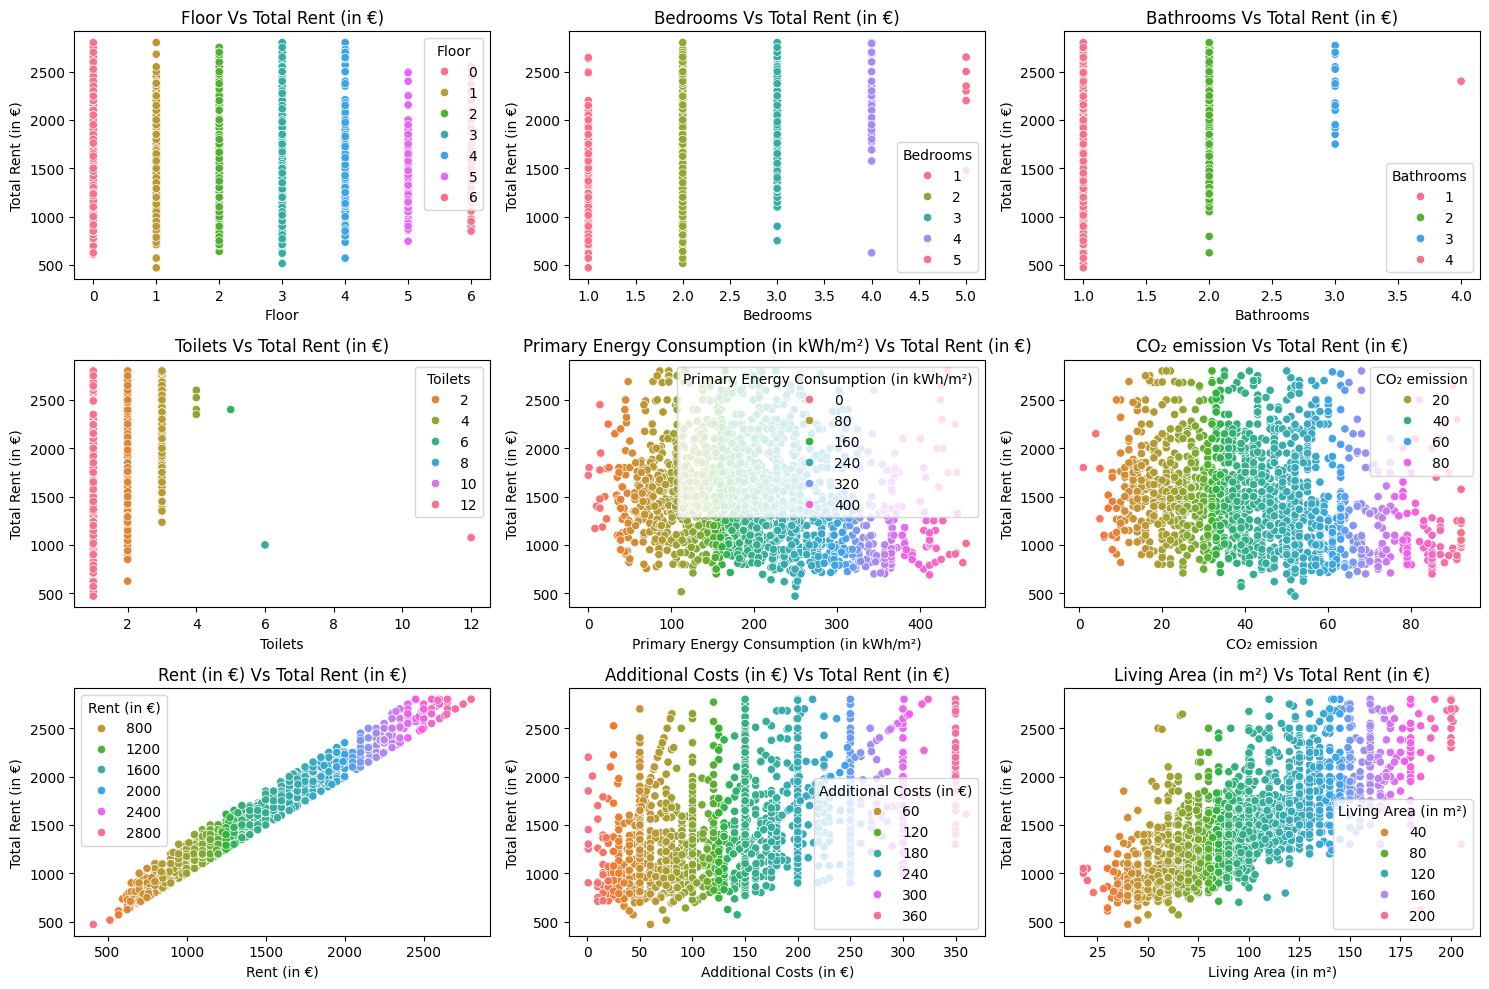

In [72]:
# Scatterplot of each numerical Variable against each attribute in the numerical column
num_of_rows = 3
num_of_cols = 3 

fig, axes = plt.subplots(nrows=num_of_rows, ncols=num_of_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    if col == "Total Rent (in €)":
        continue 
    else:
        ax = axes[i] 
        sns.scatterplot(y='Total Rent (in €)', x=col, data=df, hue=col, palette="husl", ax=ax)
        ax.set_title(f'{col} Vs Total Rent (in €)')
        ax.set_xlabel(col)
        ax.set_ylabel('Total Rent (in €)')
        
plt.tight_layout()
plt.show()

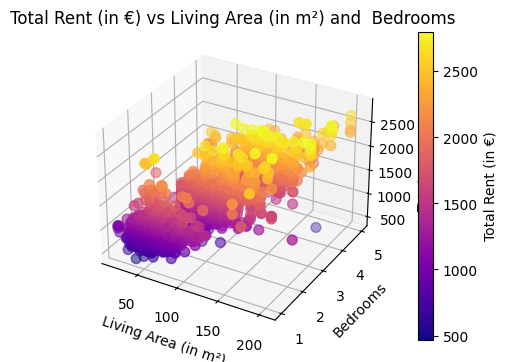

In [73]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Living Area (in m²)'], df['Bedrooms'], df['Total Rent (in €)'], c=df['Total Rent (in €)'], cmap='plasma', s=50)

ax.set_xlabel('Living Area (in m²)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Total Rent (in €)')
plt.title('Total Rent (in €) vs Living Area (in m²) and  Bedrooms')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Total Rent (in €)')

plt.show()

In [74]:
categorical_columns

['Kitchen',
 'Energy Class',
 'Heating Type',
 'Double Glazing',
 'Tenement',
 'House Type',
 'Furnished',
 'Building Condition',
 'Elevator']

In [75]:
df[categorical_columns].dtypes

Kitchen               object
Energy Class          object
Heating Type          object
Double Glazing        object
Tenement              object
House Type            object
Furnished             object
Building Condition    object
Elevator              object
dtype: object

Removing the outlier using the Method for Categorical Data

In [76]:
# Changingtype of the 'kitchen' and 'Heating Type' so that we can remove irrelevant values from the column and to also check 
df['Kitchen'] = df['Kitchen'].apply(lambda x: ', '.join(x) if isinstance(x, (list, np.ndarray)) else str(x))
df['Kitchen'] = df['Kitchen'].astype('category')
df['Heating Type'] = df['Heating Type'].apply(lambda x: ', '.join(x) if isinstance(x, (list, np.ndarray)) else str(x))
df['Heating Type'] = df['Heating Type'].astype('category')

In [77]:

categorical_attribute_columns = ['Kitchen', 'Energy Class', 'Heating Type', 'Double Glazing', 'Tenement','House Type','Furnished','Building Condition','Elevator']

for feature in categorical_attribute_columns:
    print(f"The feature is {feature} and Number of categories are {df[feature].unique()}")

The feature is Kitchen and Number of categories are ['Installed', 'USA hyper equipped', 'Hyper equipped', 'Not installed', 'Semi equipped', 'USA semi equipped', 'USA installed', 'USA uninstalled']
Categories (8, object): ['Hyper equipped', 'Installed', 'Not installed', 'Semi equipped', 'USA hyper equipped', 'USA installed', 'USA semi equipped', 'USA uninstalled']
The feature is Energy Class and Number of categories are ['Not specified' 'E' 'B' 'G' 'D' 'C' 'F' 'A']
The feature is Heating Type and Number of categories are ['Gas', 'Fuel oil', 'Electric', 'Pellet', 'Carbon']
Categories (5, object): ['Carbon', 'Electric', 'Fuel oil', 'Gas', 'Pellet']
The feature is Double Glazing and Number of categories are ['No' 'Yes']
The feature is Tenement and Number of categories are ['No']
The feature is House Type and Number of categories are ['Apartment ' 'Studio ' 'Penthouse ' 'Duplex ' 'Ground floor ' 'House '
 'Loft ' 'Triplex ' 'Exceptional property ' 'Town-house ' 'Villa '
 'Service flat ' 'St

C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\3284807506.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Total Rent (in €)'][df['House Type'] == house_type] for house_type in house_types],labels=house_types,patch_artist=True,showmeans=True,showfliers=False)


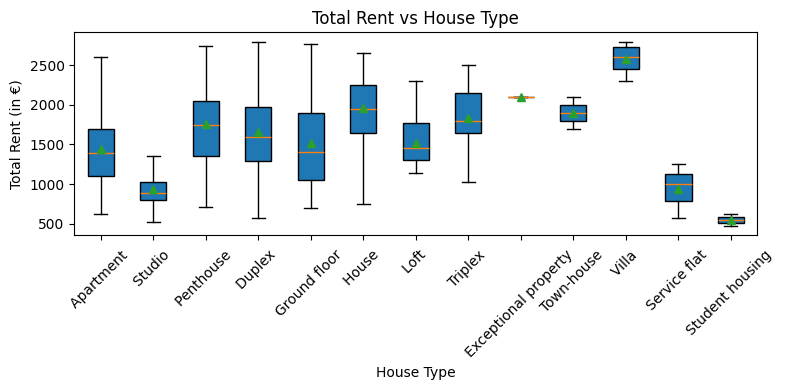

In [78]:
house_types = ['Apartment ', 'Studio ', 'Penthouse ', 'Duplex ', 'Ground floor ', 'House ',
               'Loft ', 'Triplex ', 'Exceptional property ', 'Town-house ', 'Villa ',
               'Service flat ', 'Student housing ']
plt.figure(figsize=(8, 4))  
plt.boxplot([df['Total Rent (in €)'][df['House Type'] == house_type] for house_type in house_types],labels=house_types,patch_artist=True,showmeans=True,showfliers=False)

plt.xlabel('House Type')
plt.ylabel('Total Rent (in €)')
plt.title('Total Rent vs House Type')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [79]:
df.head(50)

,Floor,Kitchen,Bedrooms,Bathrooms,Toilets,Primary Energy Consumption (in kWh/m²),Energy Class,CO₂ emission,Heating Type,Double Glazing,Rent (in €),Additional Costs (in €),Tenement,House Type,Living Area (in m²),Furnished,Building Condition,Elevator,Total Rent (in €)
1,3,Installed,2,1,1,234,Not specified,49,Gas,No,1150,200.00,No,Apartment,90,No,As new,Unknown,1350
2,3,USA hyper equipped,2,1,1,242,E,52,Gas,Yes,1200,80.00,No,Apartment,90,Unknown,Good,No,1280
4,4,Hyper equipped,1,1,1,412,Not specified,76,Gas,No,960,80.00,No,Apartment,70,Yes,As new,Yes,1040
6,2,Hyper equipped,1,1,1,206,Not specified,50,Gas,Yes,1050,150.00,No,Apartment,50,Yes,Just renovated,No,1200
7,3,Hyper equipped,2,1,1,247,Not specified,63,Gas,Yes,1250,200.00,No,Apartment,60,Yes,Just renovated,No,1450
9,0,Installed,1,1,1,86,B,17,Gas,Yes,900,130.00,No,Apartment,60,No,As new,Yes,1030
11,1,Installed,2,1,1,252,Not specified,54,Gas,Yes,625,105.00,No,Studio,40,No,As new,Yes,730
14,6,Hyper equipped,1,1,1,407,G,87,Gas,Yes,1250,144.58,No,Apartment,90,No,As new,Yes,1250
15,1,Not installed,1,1,1,407,G,87,Gas,Yes,980,113.35,No,Apartment,70,No,As new,Unknown,980
17,3,Installed,1,1,1,245,Not specified,53,Gas,Yes,950,138.51,No,Studio,45,Yes,Just renovated,No,950


In [80]:
df.shape

(2146, 19)

In [81]:
df.to_csv('Asgn2using_Cleaned Data.csv')

In [82]:
threshold = 0.05 * len(df)
for column in categorical_attribute_columns:
    freq = df[column].value_counts()
    rare_categories = freq[freq < threshold].index
    df[column] = df[column].replace(rare_categories, 'Others')

C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\1212124277.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(rare_categories, 'Others')
C:\Users\Junaid\AppData\Local\Temp\ipykernel_9960\1212124277.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[column] = df[column].replace(rare_categories, 'Others')


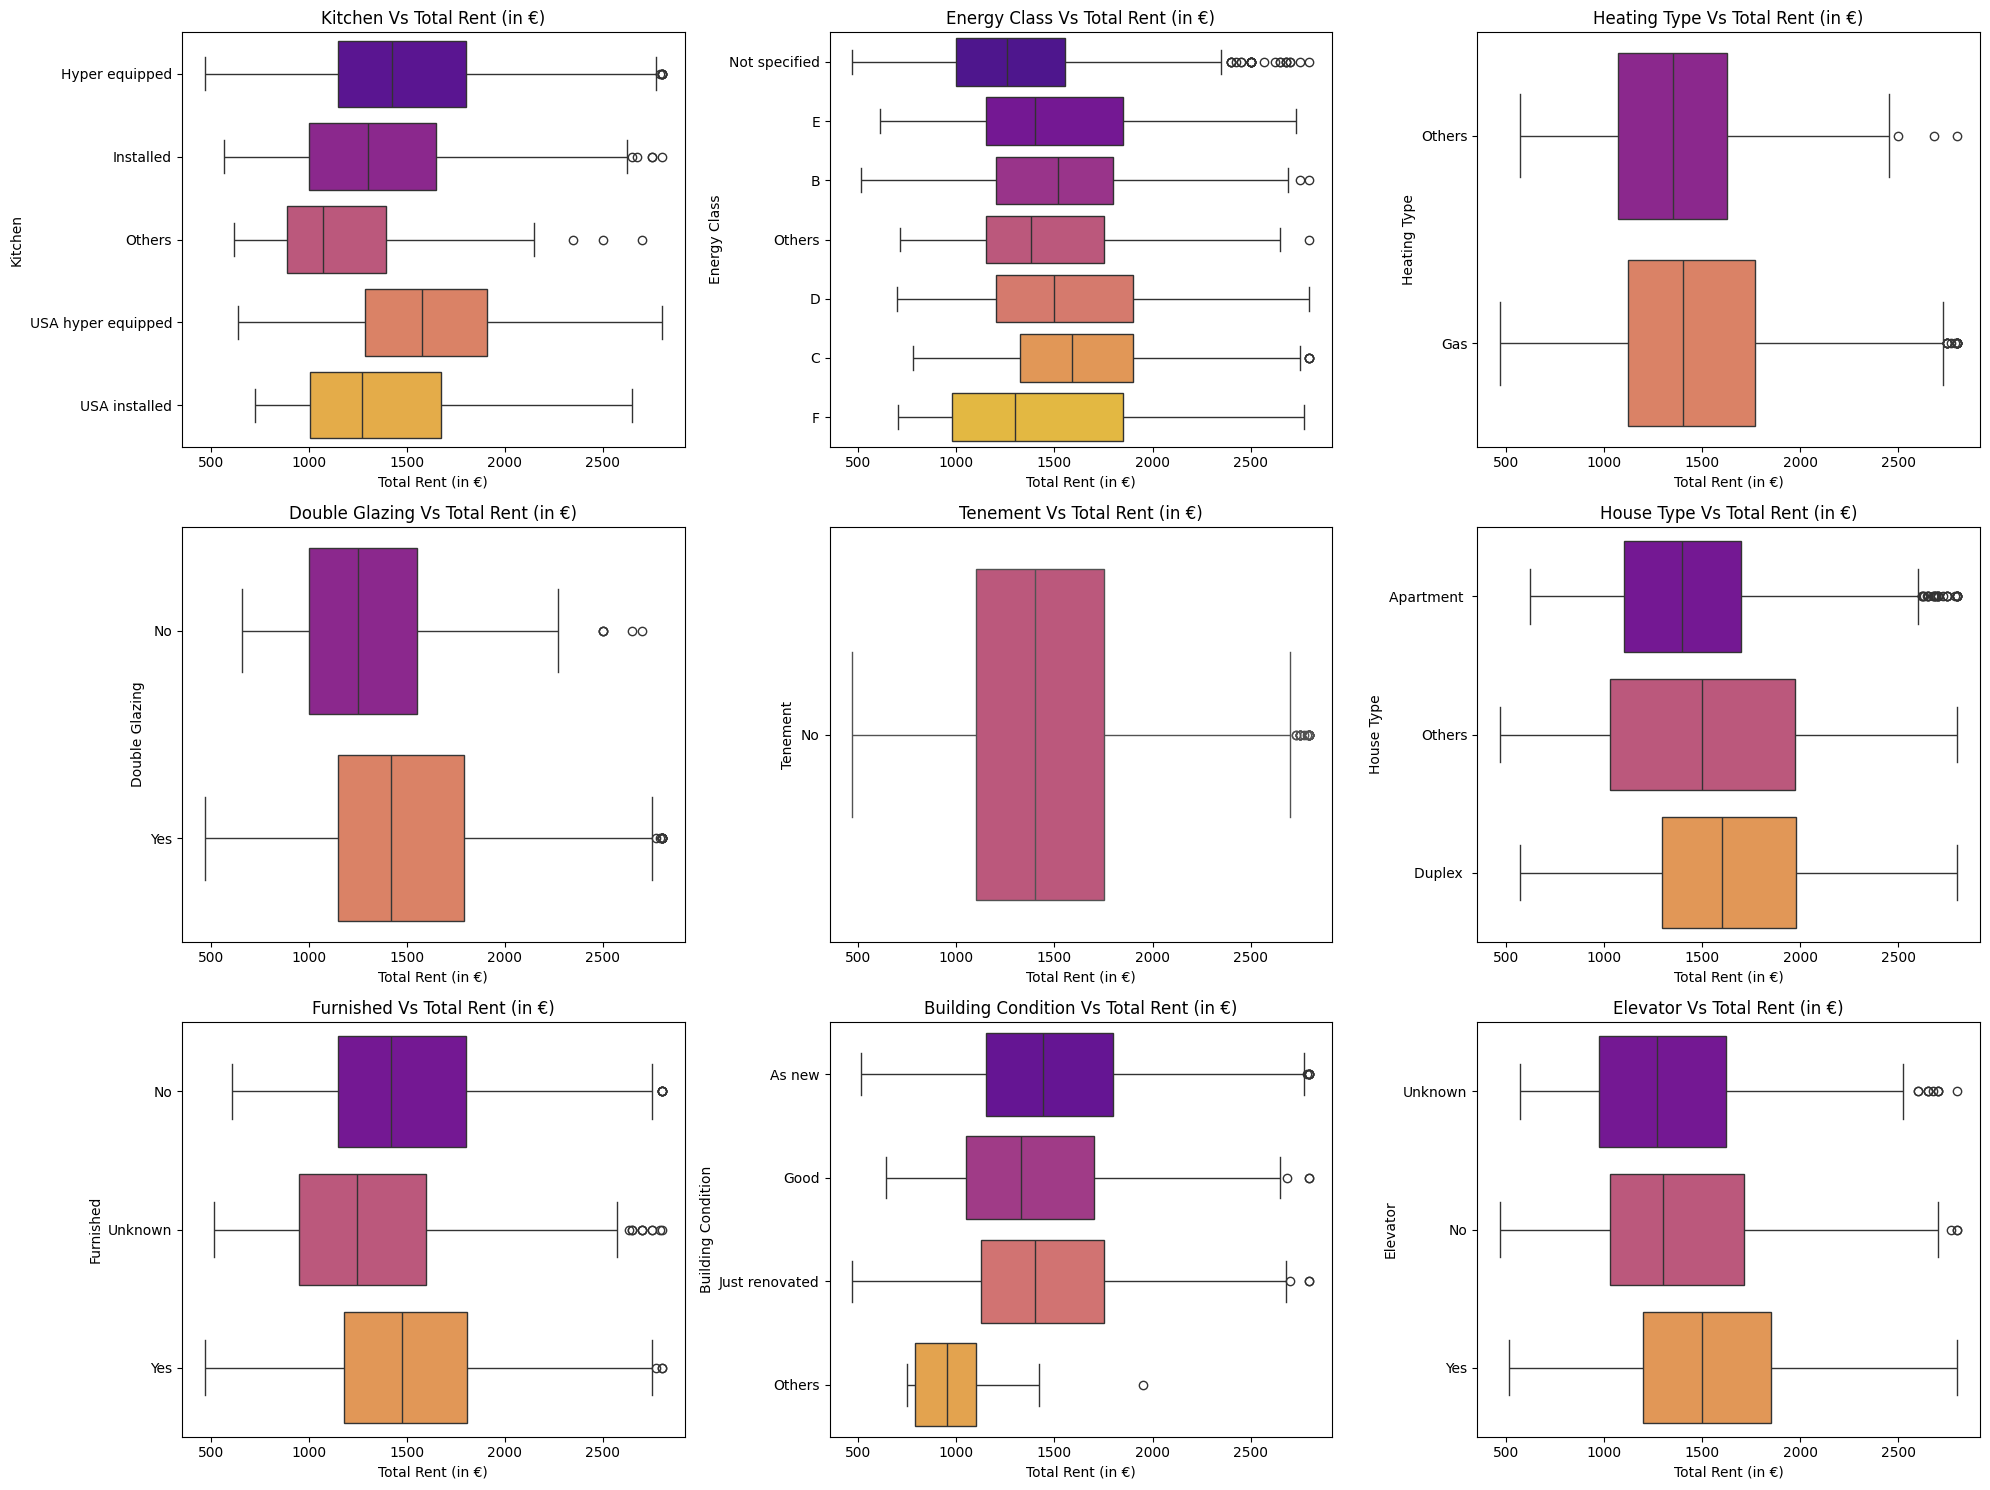

In [83]:
num_rows = 3 
num_cols = 3  

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))
axes = axes.flatten()

# Iterate through the categorical columns to create subplots
for i, col in enumerate(categorical_attribute_columns):
    ax = axes[i]
    sns.boxplot(x='Total Rent (in €)', y=col, data=df, hue=col, palette="plasma", ax=ax)
    ax.set_title(f'{col} Vs Total Rent (in €)')
    ax.set_xlabel('Total Rent (in €)')
    ax.set_ylabel(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

CONFUSION MATRIX (Correlation between the 'Total Rent (in €)' and Numerical attributes in the Dataset)
---

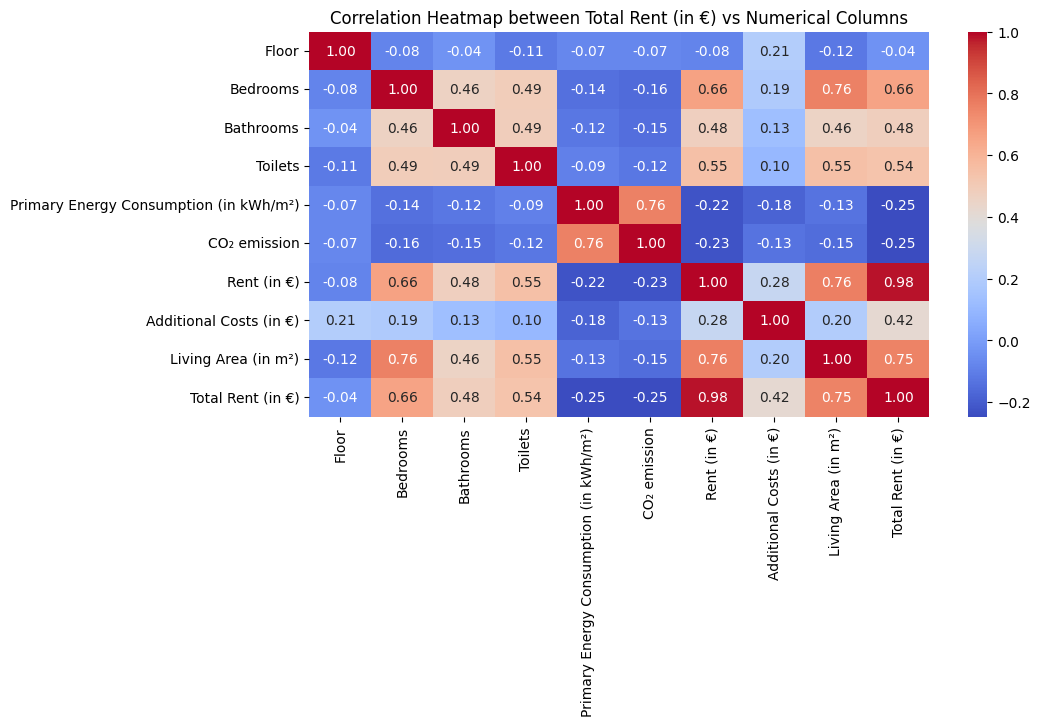

In [84]:
Numerical_attribute_columns = ['Floor',
 'Bedrooms',
 'Bathrooms',
 'Toilets',
 'Primary Energy Consumption (in kWh/m²)',
 'CO₂ emission',
 'Rent (in €)',
 'Additional Costs (in €)',
 'Living Area (in m²)',
 'Total Rent (in €)']

correlation_matrix = df[Numerical_attribute_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Total Rent (in €) vs Numerical Columns')
plt.show()